## 1. Intro

### 1.1 Data Set
In this project, we are working on the IMDb movie reviews which is collected from the IMDb website http://www.imdb.com/. 

The Internet Movie Database (IMDb) is an online database of information related to films, television programs and video games, including cast, production crew, fictional characters, biographies, plot summaries, trivia and reviews. It's launched in 1990 by computer programmer Col Needham. As of September 2016, IMDb has approximately 3.9 million titles (including episodes) and 7.4 million personalities in its database, as well as 67 million registered users. [*From Wikipedia*]


### 1.2 Data Preprocessing
In order to collect the all the information from the IMDb website. We make use of the [imdbpie](https://github.com/richardasaurus/imdb-pie) module. And we save the results into two tables in sqlite3. Due to the limitation of time, we only randomly crawl about 1% of all the movies in IMDb. Code for data collection can be found at [Data Collection Code]( https://github.com/JinyiLu/15688-Team/blob/master/doc/DataCollection.md). Data can be found at [Data]()

We store the data in two sqlite3 tables: **movie** and **review**.

**Movie** contains all the information about movies. Its schema is:

| Column Name  |  Type | Comment |
|---|---|---|
| imdb_id  | TEXT  | primary key  |
| title  | TEXT  | title of the movie  |
| type  | TEXT  | type of the movie  |
| year | INTEGER | movie release year |
| tagline | TEXT | |
| plots | TEXT | |
| plot_outline | TEXT | |
| rating | INTEGER | |
| genres | TEXT | |
| votes | INTEGER | number of user vote the movies |
| runtime | INTEGER | in seconds |
| poster_url | TEXT | |
| cover_url | TEXT | |
| release_date | TEXT | |
| certification | TEXT | |
| trailer_image_urls | TEXT | |
| directors_sumary | TEXT | |
| creators | TEXT | |
| cast_summary | TEXT | |
| writers_summary | TEXT | |
| credits | TEXT | |
| trailers | TEXT | ||


**Review** contains all the information about reviews. Its schema is:

| Column Name  |  Type | Comment |
|---|---|---|
|imdb_id | TEXT | |
|username | TEXT | |
|content | TEXT | |
|postdate| TEXT | |
|rating | INTEGER | user rating 1-10 |
|summary | TEXT | review summary |
|status | TEXT | |
|user_location|TEXT| |
|user_score| INTEGER | |
|user_score_count | INTEGER | ||

Following are some samples:

In [91]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ast

%matplotlib inline
# plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0) # you should adjust this to fit your screen

In [2]:
DB_NAME = '../data/imdb_final.db'
conn = sqlite3.connect(DB_NAME)

df = pd.read_sql_query("SELECT * FROM movie", conn)
df.head()

,imdb_id,title,type,year,tagline,plots,plot_outline,rating,genres,votes,...,cover_url,release_date,certification,trailer_image_urls,directors_summary,creators,cast_summary,writers_summary,credits,trailers
0,tt1756420,Bez vini vinovatiye,feature,2008,None,[],None,5.1,[u'Drama'],18,...,None,None,None,[],[<Person: u'Gleb Panfilov' (u'nm0659368')>],[],"[<Person: u'Inna Churikova' (u'nm0161500')>, <...",[],"[<Person: u'Gleb Panfilov' (u'nm0659368')>, <P...",[]
1,tt0241250,The Blind Date,feature,2000,None,"[u""Lucy Kennedy, a one time police detective w...","Lucy Kennedy, a one time police detective whos...",6.2,[u'Thriller'],39,...,None,None,15,[],[<Person: u'Nigel Douglas' (u'nm0235196')>],[],"[<Person: u'Zara Turner' (u'nm0877947')>, <Per...","[<Person: u'Simon Booker' (u'nm0095405')>, <Pe...","[<Person: u'Nigel Douglas' (u'nm0235196')>, <P...",[]
2,tt0106806,Emmanuelle's Love,feature,1993,The Legend is back and the adventure begins!,"[u""Emmanuelle withdraws into a temple in Tibet...","Emmanuelle withdraws into a temple in Tibet, w...",4.6,"[u'Drama', u'Romance']",152,...,https://images-na.ssl-images-amazon.com/images...,1993-04-04,18,[],[<Person: u'Francis Leroi' (u'nm0163095')>],[],[<Person: u'Marcela Walerstein' (u'nm0907380')...,"[<Person: u'Emmanuelle Arsan' (u'nm0037491')>,...","[<Person: u'Francis Leroi' (u'nm0163095')>, <P...",[]
3,tt2635824,We Ride: The Story of Snowboarding,documentary,2013,The story of snowboarding told by the people w...,"[u""Grain Media and Burn Energy Drink tell the ...",Grain Media and Burn Energy Drink tell the sto...,7.8,"[u'Documentary', u'Adventure', u'History', u'S...",81,...,https://images-na.ssl-images-amazon.com/images...,2013-01-31,None,[],"[<Person: u'Jon Drever' (u'nm2270358')>, <Pers...",[],"[<Person: u'Danny Davis' (u'nm2289497')>, <Per...",[<Person: u'Jon Drever' (u'nm2270358')>],"[<Person: u'Jon Drever' (u'nm2270358')>, <Pers...",[]
4,tt0426589,Succubus,feature,1987,Sex Slaves To The Devil!,[u'The Von Romburg castle has been cursed ever...,The Von Romburg castle has been cursed ever si...,6.6,[u'Horror'],7,...,None,1987,None,[],[<Person: u'Patrick Dromgoole' (u'nm0238245')>],[],"[<Person: u'Barry Foster' (u'nm0287687')>, <Pe...","[<Person: u'Bob Baker' (u'nm0048276')>, <Perso...",[<Person: u'Patrick Dromgoole' (u'nm0238245')>...,[]


In [3]:
df = pd.read_sql_query("SELECT * FROM review", conn)
df.head()

,imdb_id,username,content,postdate,rating,summary,status,user_location,user_score,user_score_count
0,tt2635824,(borkoboardo),It's a difficult one - the history of snowboar...,2013-02-26,4.0,Fans will love it!,G,Livigno,6.0,9.0
1,tt2635824,surfs_up1976,Another attempt of capturing the history of sn...,2013-02-25,3.0,"Oh boy, what a mess...",S,Sweden,3.0,4.0
2,tt0079677,lazarillo,This is one of those films that kind of fall i...,2008-11-24,NaN,Not good but interesting--and certainly offbea...,G,"Denver, Colorado and Santiago, Chile",5.0,7.0
3,tt0079677,Wizard-8,"Today, the all-but-forgotten movie ""(Friday Th...",2012-07-23,NaN,"Great effort is obvious, but it doesn't work i...",G,"Victoria, BC",2.0,3.0
4,tt0079677,HumanoidOfFlesh,After tragic death of his parents-the woman ac...,2010-12-12,8.0,Young boy's tormented psyche.,G,"Chyby, Poland",4.0,7.0


## 2. Data Set Analysis

### 2.x User Location

Users in IMDb comes from various kinds of countries. It is very interesting to do some analysis to see if there are any location bias in terms of movie preference.



In [30]:
user = pd.read_sql_query("SELECT * FROM review", conn)

In [49]:
# group different location into usa
usa = ['United States', 'USA', 'Alabama', 'AL', 'Alaska', 'AK', 'Arizona', 'AZ', 'Arkansas',\
      'AR', 'California', 'CA', 'Colorado', 'CO', 'Connecticut', 'CT', 'Delaware', 'DE', \
      'Florida', 'FL', 'Georgia', 'GA', 'Hawaii', 'HI', 'Idaho', 'ID', 'Illinois', 'IL', \
      'Indiana', 'IN', 'Iowa', 'IA', 'Kansas', 'KS', 'Kentucky', 'KY', 'Louisiana', 'LA', \
      'Maine', 'ME', 'Maryland', 'MD', 'Massachusetts', 'MA', 'Michigan', 'MI', 'Minnesota', \
      'MN', 'Mississippi', 'MS', 'Missouri', 'MO', 'Montana', 'MT', 'Nebraska', 'NE', \
      'Nevada', 'NV', 'New Hampshire', 'NH', 'New Jersey', 'NJ', 'New Mexico', 'NM', 'New York', \
      'NY', 'North Carolina', 'NC', 'North Dakota', 'ND', 'Ohio', 'OH', 'Oklahoma', 'OK', \
      'Oregon', 'OR', 'Pennsylvania', 'PA', 'Rhode Island', 'RI', 'South Carolina', 'SC', \
      'South Dakota', 'SD', 'Tennessee', 'TN', 'Texas', 'TX', 'Utah', 'UT', 'Vermont', 'VT',\
      'Virginia', 'VA', 'Washington', 'WA', 'West Virginia', 'WV', 'Wisconsin', 'WI', \
      'Wyoming', 'WY', 'US', 'Los Angeles', 'Chicago']

reg = []
for u in usa:
    reg.append('.*'+u+'.*')

user['user_location'] = user['user_location'].replace(to_replace=reg, value='United States', regex=True)

mask = ['UK', '.*London.*', 'England', '.*United Kingdom.*']
user['user_location'] = user['user_location'].replace(to_replace=mask, value='United Kingdom', regex=True)

mask = ['.*Australia.*']
user['user_location'] = user['user_location'].replace(to_replace=mask, value='Australia', regex=True)

mask = ['.*Canada.*']
user['user_location'] = user['user_location'].replace(to_replace=mask, value='Canada', regex=True)

Firstly, we try to analysis the user location distribution in our dataset. So we plot the distribution of number of users in each country in the log scale.

(21637, 10)


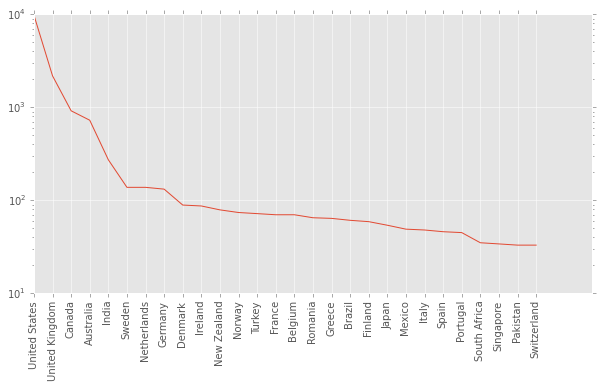

In [78]:
# drop duplicate users
user_nodup = user.drop_duplicates('username')
print user_nodup.shape

loc_freq = user_nodup['user_location'].value_counts()
loc_freq = loc_freq[loc_freq>30]

plt.plot(range(len(loc_freq)), loc_freq.values)
plt.yscale('log')
plt.xticks(range(len(loc_freq)), loc_freq.index, rotation='vertical')

plt.show()

As we can see from the figure, most of the users in IMDb are coming from United States, United Kingdom, Canada and Australia. How about the average rating for each country?

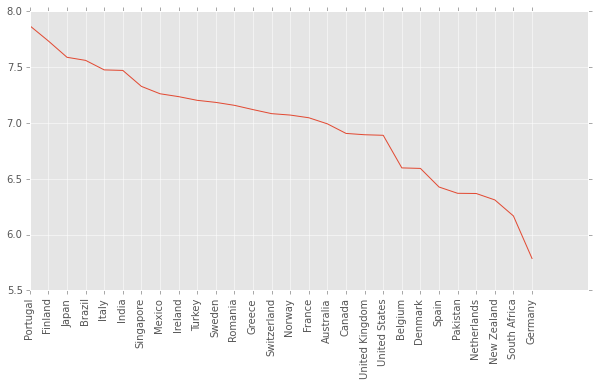

In [60]:
user_rating = user.dropna(axis=0, subset=['rating'])
# only consider top countries
user_rating = user_rating[user_rating['user_location'].isin(loc_freq.index)]
loc_rating = user_rating.groupby('user_location')['rating'].mean()
loc_rating = loc_rating.sort_values(ascending=False)

plt.plot(range(len(loc_rating)), loc_rating.values)
plt.xticks(range(len(loc_rating)), loc_rating.index, rotation='vertical')

plt.show()

It's very interesting users in some popular countries tend to give a low rating compare with other countries. For example, the numbers of users in Germany and Sweden are almost the same. But in generally German tend to give a lower rate to the movies than Swedish so they are more critical when watching movies.

### 2.x Movie Release Date
Besides the geospatial dimensionality, it's also interesting to analysis something related to time. Is the number of relased movies is keep growing?

In [61]:
movie = pd.read_sql_query("SELECT * FROM movie", conn)

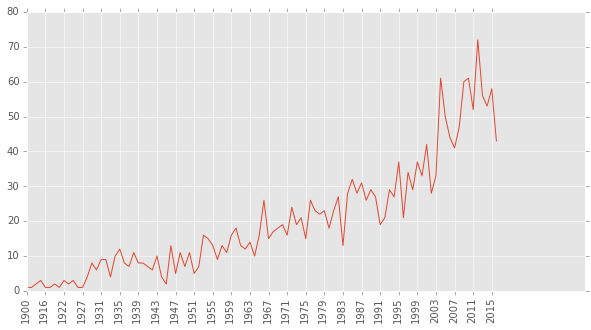

In [79]:
# only consider feature type movie
movie_onlyfeature = movie[movie['type'] == 'feature']
year_freq = movie_onlyfeature['year'].value_counts()
year_freq = year_freq.sort_index()

plt.plot(range(len(year_freq)), year_freq.values)

labels = []
idx = []
for i in range(0, len(year_freq), 4):
    idx.append(i)
    labels.append(year_freq.index[i])

plt.xticks(idx, labels, rotation='vertical')

plt.show()

Although IMDb was launched in 1990, it still contains many information about old movies. It's very clear that general trend of the number of movies that are released in each year are increasing. And recently, the velocity of increase is very fast.

How about the length of the movie?

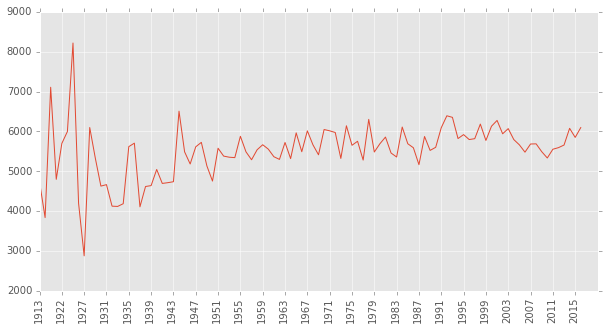

In [89]:
movie_runtime = movie_onlyfeature.dropna(axis=0, subset=['runtime', 'year'])

year_runtime = movie_runtime.groupby('year')['runtime'].mean()
year_runtime = year_runtime.sort_index()

plt.plot(range(len(year_runtime)), year_runtime.values)

labels = []
idx = []
for i in range(0, len(year_runtime), 4):
    idx.append(i)
    labels.append(year_runtime.index[i])
    
plt.xticks(idx, labels, rotation='vertical')

plt.show()

The result shows that although we generally tend to produce more movies. The length of the movie doesn't change a lot.

### 2.x Genre Information


In [105]:
# only consider the movies with large number of votes
movie_rating = movie_onlyfeature[movie_onlyfeature['votes'] > 30]

genres = {}
for row in movie_rating.iterrows():
    gs = ast.literal_eval(row[1]['genres'])
    if gs is None:
        continue
    for g in gs:
        if g in genres:
            genres[g]['cnt'] += 1
            genres[g]['rating'] += row[1]['rating']
        else:
            genres[g] = {'cnt':1, 'rating':row[1]['rating'], 'label':g}




Empty DataFrame
Columns: [avg_rating, cnt, label]
Index: []



## Analysis
* General statistics
* Rating sparsity (compare with MovieLen)
* Rating cnt / review cnt
* Rating vs rating cnt
* Rating vs user cnt
* (Review/Movie) rating vs movie cnt
* ~~Location vs user cnt~~
* Location vs movie cnt
* TOP
    * TOP rating/review cnt movie
    * TOP movie/review rating movie (vote threshold)
        * Movie title, trailers, runtime, credits, cover
    * TOP review cnt user
* ~~Post date vs movie cnt~~
* ~~Post date vs avg runtime~~
* Genre vs movie cnt
* Genre vs vote, movie rating
* Genre vs avg runtime

* Agree and disagree

## Recommendation System
* Sparsity -> traidional methods may not work
* Potentional solutions

## Reference
* https://en.wikipedia.org/wiki/IMDb
* https://github.com/richardasaurus/imdb-pie
* https://github.com/JinyiLu/15688-Team